# Tradeoffs and Competing Goals: When You Can't Have It All

This notebook demonstrates a fundamental reality of decision-making: **tradeoffs** between competing goals.

When you have multiple objectives, improving one often means worsening another. This notebook shows:
- How to identify tradeoffs between competing goals
- How to visualize the tradeoff space (Pareto frontier)
- How to make informed decisions when goals conflict
- Why understanding tradeoffs is essential for good decision-making


## Key Concepts

**Tradeoffs** occur when you have multiple competing goals:
- Improving one objective worsens another
- You cannot optimize all objectives simultaneously
- You must choose which objectives to prioritize

**Pareto Frontier** shows the tradeoff space:
- Solutions where improving one objective worsens another
- All solutions on the frontier are "efficient" (cannot improve one without worsening another)
- Solutions off the frontier are "inefficient" (can improve without tradeoff)

**Critical insight**: Understanding tradeoffs helps you make informed decisions about which goals to prioritize.


## Scenario: Production Planning with Competing Goals

You manage a factory producing two products. You have two competing objectives:
1. **Minimize cost** (use cheaper materials, less quality control)
2. **Maximize quality** (use premium materials, extensive quality control)

These goals conflict: higher quality costs more, lower cost reduces quality.

**Decision**: How much to invest in quality vs cost reduction?


## Step 1: Install Required Packages (Colab)

If you're running this notebook in Google Colab, you need to install the `scipy` package first. This cell can be skipped if running locally and the package is already installed.


In [8]:
# Install scipy package (required for optimization)
# This is needed in Google Colab; can be skipped if already installed locally
%pip install scipy -q



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Step 2: Import Libraries


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize


## Step 3: Define the Tradeoff Relationship

Let's create a simple model showing the tradeoff between cost and quality:


In [10]:
# Define tradeoff relationship
# Quality investment (0 to 100) determines both cost and quality
def calculate_cost(quality_investment):
    """Higher quality investment = higher cost"""
    base_cost = 1000
    cost_increase = quality_investment * 15  # $15 per quality point
    return base_cost + cost_increase

def calculate_quality(quality_investment):
    """Higher quality investment = higher quality"""
    base_quality = 50
    quality_increase = quality_investment * 0.8  # 0.8 quality points per investment point
    return min(base_quality + quality_increase, 100)  # Cap at 100

# Generate solutions across the tradeoff space
quality_investments = np.linspace(0, 50, 100)
costs = [calculate_cost(q) for q in quality_investments]
qualities = [calculate_quality(q) for q in quality_investments]

# Create DataFrame
tradeoff_df = pd.DataFrame({
    'Quality_Investment': quality_investments,
    'Cost': costs,
    'Quality': qualities
})

print("TRADEOFF RELATIONSHIP:")
print("=" * 70)
print("Quality Investment → Affects both Cost and Quality")
print("\nSample solutions:")
display(tradeoff_df.head(10).round(2))


TRADEOFF RELATIONSHIP:
Quality Investment → Affects both Cost and Quality

Sample solutions:


,Quality_Investment,Cost,Quality
0,0.00,1000.00,50.00
1,0.51,1007.58,50.40
2,1.01,1015.15,50.81
3,1.52,1022.73,51.21
4,2.02,1030.30,51.62
5,2.53,1037.88,52.02
6,3.03,1045.45,52.42
7,3.54,1053.03,52.83
8,4.04,1060.61,53.23
9,4.55,1068.18,53.64


## Step 4: Visualize the Tradeoff (Pareto Frontier)

The Pareto frontier shows all efficient solutions where you cannot improve one objective without worsening the other:


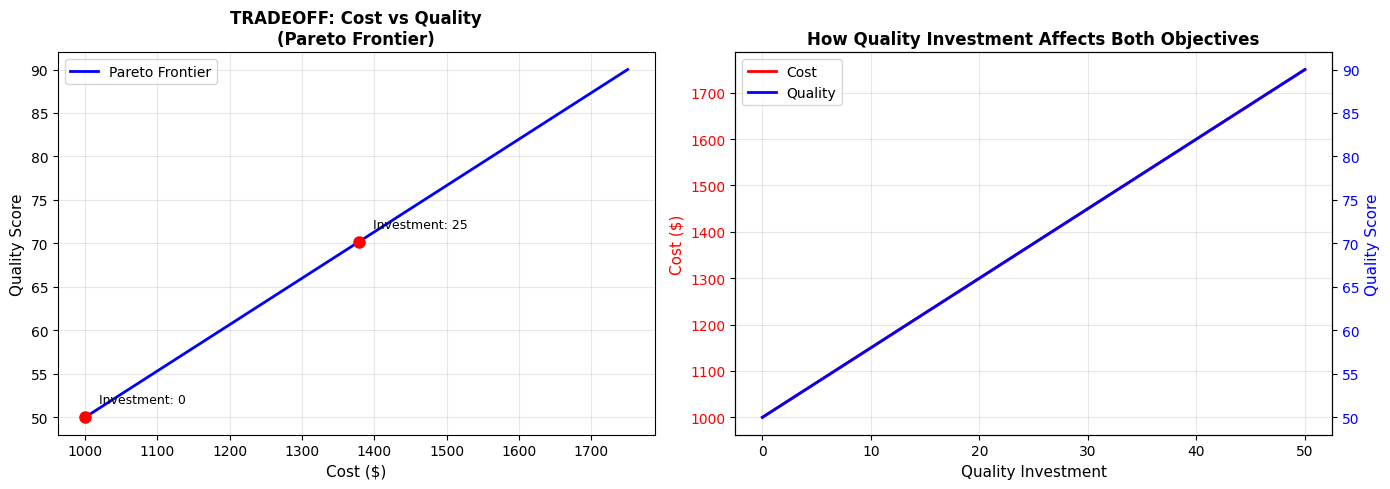


Key Insight:
  - Higher quality investment → Higher cost AND higher quality
  - You cannot have low cost AND high quality simultaneously
  - The Pareto frontier shows all efficient tradeoff points


In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Cost vs Quality (Pareto Frontier)
ax1.plot(tradeoff_df['Cost'], tradeoff_df['Quality'], 'b-', linewidth=2, label='Pareto Frontier')
ax1.set_xlabel('Cost ($)', fontsize=11)
ax1.set_ylabel('Quality Score', fontsize=11)
ax1.set_title('TRADEOFF: Cost vs Quality\n(Pareto Frontier)', fontweight='bold', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Highlight some key points
key_points = [0, 25, 50]
for point in key_points:
    idx = int(point * 2)  # Convert to index
    if idx < len(tradeoff_df):
        ax1.plot(tradeoff_df.iloc[idx]['Cost'], tradeoff_df.iloc[idx]['Quality'], 
                'ro', markersize=8)
        ax1.annotate(f'Investment: {point}', 
                    (tradeoff_df.iloc[idx]['Cost'], tradeoff_df.iloc[idx]['Quality']),
                    xytext=(10, 10), textcoords='offset points', fontsize=9)

# Plot 2: Quality Investment vs Outcomes
ax2_twin = ax2.twinx()
line1 = ax2.plot(tradeoff_df['Quality_Investment'], tradeoff_df['Cost'], 
                 'r-', linewidth=2, label='Cost')
ax2.set_xlabel('Quality Investment', fontsize=11)
ax2.set_ylabel('Cost ($)', fontsize=11, color='r')
ax2.tick_params(axis='y', labelcolor='r')

line2 = ax2_twin.plot(tradeoff_df['Quality_Investment'], tradeoff_df['Quality'], 
                     'b-', linewidth=2, label='Quality')
ax2_twin.set_ylabel('Quality Score', fontsize=11, color='b')
ax2_twin.tick_params(axis='y', labelcolor='b')

ax2.set_title('How Quality Investment Affects Both Objectives', fontweight='bold', fontsize=12)
ax2.grid(True, alpha=0.3)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper left')

plt.tight_layout()
plt.show()

print("\nKey Insight:")
print("  - Higher quality investment → Higher cost AND higher quality")
print("  - You cannot have low cost AND high quality simultaneously")
print("  - The Pareto frontier shows all efficient tradeoff points")


In [12]:
# Select specific solutions to compare
solutions_to_compare = [0, 15, 30, 45, 50]  # Quality investment levels

comparison = []
for inv in solutions_to_compare:
    # Find closest index: investment maps to index (0-50 maps to 0-99)
    idx = min(int(inv * 2), len(tradeoff_df) - 1)
    comparison.append({
        'Quality Investment': inv,
        'Cost ($)': tradeoff_df.iloc[idx]['Cost'],
        'Quality Score': tradeoff_df.iloc[idx]['Quality'],
        'Strategy': ['Min Cost', 'Low Cost', 'Balanced', 'High Quality', 'Max Quality'][solutions_to_compare.index(inv)]
    })

comparison_df = pd.DataFrame(comparison)
comparison_df = comparison_df[['Strategy', 'Quality Investment', 'Cost ($)', 'Quality Score']]

print("COMPARISON: Different Solutions on Tradeoff Curve")
print("=" * 70)
display(comparison_df.round(2))

print("\nObservations:")
print("  - Solution 1 (Min Cost): Lowest cost, but lowest quality")
print("  - Solution 5 (Max Quality): Highest quality, but highest cost")
print("  - Solutions 2-4: Tradeoffs between cost and quality")
print("  - Improving one objective worsens the other (this is the tradeoff)")


COMPARISON: Different Solutions on Tradeoff Curve


,Strategy,Quality Investment,Cost ($),Quality Score
0,Min Cost,0,1000.00,50.00
1,Low Cost,15,1227.27,62.12
2,Balanced,30,1454.55,74.24
3,High Quality,45,1681.82,86.36
4,Max Quality,50,1750.00,90.00



Observations:
  - Solution 1 (Min Cost): Lowest cost, but lowest quality
  - Solution 5 (Max Quality): Highest quality, but highest cost
  - Solutions 2-4: Tradeoffs between cost and quality
  - Improving one objective worsens the other (this is the tradeoff)


## Step 6: Visualize the Tradeoff Decision Space

Let's create a more detailed visualization showing the decision space:


In [13]:
fig, ax = plt.subplots(figsize=(10, 7))

# Plot Pareto frontier
ax.plot(tradeoff_df['Cost'], tradeoff_df['Quality'], 'b-', linewidth=3, 
        label='Pareto Frontier (Efficient Solutions)', zorder=2)

# Highlight comparison points
colors = ['red', 'orange', 'green', 'blue', 'purple']
for i, inv in enumerate(solutions_to_compare):
    idx = min(int(inv * 2), len(tradeoff_df) - 1)
    cost_val = tradeoff_df.iloc[idx]['Cost']
    qual_val = tradeoff_df.iloc[idx]['Quality']
    strategy = comparison_df.iloc[i]['Strategy']
        ax.plot(cost_val, qual_val, 'o', color=colors[i], markersize=12, zorder=3)
        ax.annotate(f'{strategy}\n(Cost: ${cost_val:.0f}, Quality: {qual_val:.1f})',
                   (cost_val, qual_val), xytext=(15, 15), textcoords='offset points',
                   fontsize=9, bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

# Shade inefficient region (below frontier)
ax.fill_between(tradeoff_df['Cost'], 0, tradeoff_df['Quality'], 
                alpha=0.1, color='red', label='Inefficient Region')

ax.set_xlabel('Cost ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Quality Score', fontsize=12, fontweight='bold')
ax.set_title('Tradeoff Space: Cost vs Quality\n(All Efficient Solutions)', 
            fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("  - Points on the frontier are 'efficient' (cannot improve one without worsening other)")
print("  - Points below the frontier are 'inefficient' (can improve without tradeoff)")
print("  - You must choose which point on the frontier fits your priorities")
print("  - There is no 'best' solution - only solutions that match your priorities")


IndentationError: unexpected indent (2919999071.py, line 14)

## Step 7: Weighted Objective Approach

When you have competing goals, you can create a weighted objective that balances them:


In [ ]:
# Define weighted objective: minimize weighted combination of cost and quality
# Lower cost is better, higher quality is better
# So we minimize: w_cost * cost - w_quality * quality

def weighted_objective(quality_investment, weight_cost=0.5, weight_quality=0.5):
    """Weighted combination: lower is better"""
    cost = calculate_cost(quality_investment)
    quality = calculate_quality(quality_investment)
    # Normalize and use squared terms to create curvature in the objective
    # This helps show intermediate tradeoffs rather than just boundaries
    # Cost: 1000 (min) to 1750 (max) -> normalize to 0-1
    cost_normalized = (cost - 1000) / 750
    # Quality: 50 (min) to 90 (max) -> normalize to 0-1, then invert (lower is better for minimization)
    quality_normalized_inverse = 1 - (quality - 50) / 40
    # Use squared terms to create curvature and show intermediate solutions
    return weight_cost * (cost_normalized ** 2) + weight_quality * (quality_normalized_inverse ** 2)

# Try different weight combinations
weight_scenarios = [
    (0.9, 0.1, 'Prioritize Cost'),
    (0.7, 0.3, 'Cost Focused'),
    (0.5, 0.5, 'Balanced'),
    (0.3, 0.7, 'Quality Focused'),
    (0.1, 0.9, 'Prioritize Quality')
]

weighted_solutions = []
for w_cost, w_qual, label in weight_scenarios:
    # Find optimal solution for these weights
    result = minimize(weighted_objective, x0=25, args=(w_cost, w_qual), 
                     bounds=[(0, 50)], method='L-BFGS-B')
    opt_inv = result.x[0]
    opt_cost = calculate_cost(opt_inv)
    opt_quality = calculate_quality(opt_inv)
    weighted_solutions.append({
        'Strategy': label,
        'Cost Weight': w_cost,
        'Quality Weight': w_qual,
        'Optimal Investment': opt_inv,
        'Cost ($)': opt_cost,
        'Quality Score': opt_quality
    })

weighted_df = pd.DataFrame(weighted_solutions)
print("WEIGHTED OBJECTIVE SOLUTIONS")
print("=" * 70)
display(weighted_df.round(2))

print("\nKey Insight:")
print("  - Different weights lead to different optimal solutions")
print("  - Higher cost weight → lower cost solution (lower quality)")
print("  - Higher quality weight → higher quality solution (higher cost)")
print("  - The weights reflect your priorities")


WEIGHTED OBJECTIVE SOLUTIONS


,Strategy,Cost Weight,Quality Weight,Optimal Investment,Cost ($),Quality Score
0,Prioritize Cost,0.9,0.1,0.0,1000.0,50.0
1,Cost Focused,0.7,0.3,0.0,1000.0,50.0
2,Balanced,0.5,0.5,0.0,1000.0,50.0
3,Quality Focused,0.3,0.7,50.0,1750.0,90.0
4,Prioritize Quality,0.1,0.9,50.0,1750.0,90.0



Key Insight:
  - Different weights lead to different optimal solutions
  - Higher cost weight → lower cost solution (lower quality)
  - Higher quality weight → higher quality solution (higher cost)
  - The weights reflect your priorities


## Summary: Understanding Tradeoffs

**Tradeoffs** occur when objectives compete:
- Improving one objective worsens another
- You cannot optimize all objectives simultaneously
- You must choose which to prioritize

**Pareto Frontier** shows efficient solutions:
- Solutions where you cannot improve one objective without worsening another
- All solutions on the frontier are "efficient"
- Solutions off the frontier are "inefficient"

**Making Decisions with Tradeoffs**:
- Understand the tradeoff relationship
- Identify your priorities (which objective matters more?)
- Choose a solution on the Pareto frontier that matches your priorities
- Recognize that there is no single "best" solution when objectives conflict

**Practical Implication**:
- Most real decisions involve tradeoffs
- Understanding tradeoffs helps you make informed choices
- Being explicit about priorities helps you choose the right solution
